In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
class_name = 'Attribution-Noncommercial-Share Alike 3.0 United States'
# Load dataset.
tracks = pd.read_csv('data/fma_metadata/tracks_reduced_dataset.csv')
features_to_drop = ['Unnamed: 0']
tracks.drop(features_to_drop, inplace=True, axis=1)

tracks.shape

(99404, 16)

In [3]:
attributes = [col for col in tracks.columns if col != class_name]

X = tracks[attributes].values
y = tracks[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [5]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)
X_test = scaler.transform(X_test)

In [6]:
#different learning rate schedules and momentum parameters
params = [{'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'adam', 'learning_rate_init': 0.01}]

labels = ["constant learning-rate", "constant with momentum",
          "inv-scaling learning-rate", "inv-scaling with momentum", "adam"]

plot_args = [{'c': 'red', 'linestyle': '-'},
             {'c': 'green', 'linestyle': '-'},
             {'c': 'blue', 'linestyle': '--'},
             {'c': 'black', 'linestyle': '.'}]

training: constant learning-rate
Training set score: 0.822150
Training set loss: 36124725948.235443
training: constant with momentum
Training set score: 0.822150
Training set loss: 3572107758080.424316
training: inv-scaling learning-rate
Training set score: 0.822150
Training set loss: 13043972747704.214844
training: inv-scaling with momentum
Training set score: 0.822271
Training set loss: 0.467875


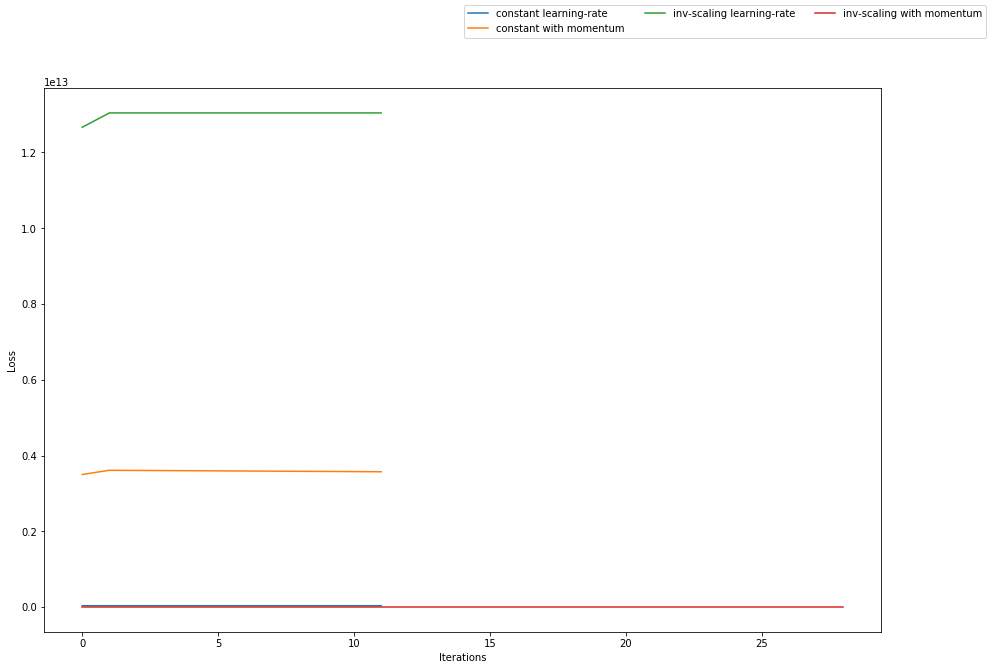

In [7]:
import warnings
import matplotlib.pyplot as plt
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier
        

fig, axes = plt.subplots(1, 1, figsize=(15, 10))      
mlps=[]   
for label, param in zip(labels, params):
    print("training: %s" % label)
    mlp = MLPClassifier(random_state=0,
                           max_iter=200, **param)

        # some parameter combinations will not converge as can be seen on the
        # plots so they are ignored here
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning,
                                    module="sklearn")
        mlp.fit(X, y)

    mlps.append(mlp)
    print("Training set score: %f" % mlp.score(X, y))
    print("Training set loss: %f" % mlp.loss_)
    
for mlp, label, args in zip(mlps, labels, plot_args):
    axes.plot(mlp.loss_curve_, label=label)
        
        
        
axes.set_ylabel("Loss")
axes.set_xlabel("Iterations")
fig.legend(axes.get_lines(), labels, ncol=3, loc=1)
plt.show()

Accuracy 0.8221447253705318
F1-score [0.90239234 0.        ]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     24518
           1       0.00      0.00      0.00      5304

    accuracy                           0.82     29822
   macro avg       0.41      0.50      0.45     29822
weighted avg       0.68      0.82      0.74     29822

Training loss 0.42006231769250524


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation loss 0.42198121865865246


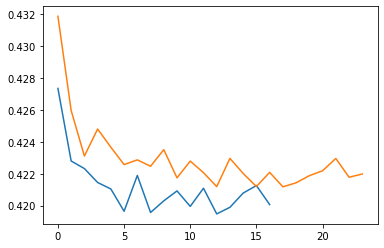

In [8]:
clf = MLPClassifier(random_state=0,solver= 'adam', learning_rate= 'constant',activation='logistic', momentum= .9, hidden_layer_sizes=(3),
           nesterovs_momentum= True, learning_rate_init= 0.2)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_score = clf.predict_log_proba(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
plt.plot(clf.loss_curve_)
print('Training loss '+str(clf.loss_))
clf.fit(X_test, y_test)
print('Validation loss '+str(clf.loss_))
plt.plot(clf.loss_curve_)
plt.show()

In [9]:
clf = MLPClassifier(random_state=0,solver= 'adam', learning_rate= 'invscaling',activation='logistic', momentum= .9, hidden_layer_sizes=(3),
           nesterovs_momentum= True, learning_rate_init= 0.2)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_score = clf.predict_log_proba(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
print('Training loss '+str(clf.loss_))
clf.fit(X_train, y_train)
print('Validation loss '+str(clf.loss_))

Accuracy 0.8221447253705318
F1-score [0.90239234 0.        ]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     24518
           1       0.00      0.00      0.00      5304

    accuracy                           0.82     29822
   macro avg       0.41      0.50      0.45     29822
weighted avg       0.68      0.82      0.74     29822

Training loss 0.42006231769250524


C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation loss 0.42006231769250524


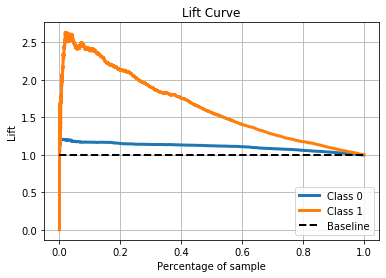

In [10]:
from scikitplot.metrics import plot_lift_curve
plot_lift_curve(y_test, y_score)
plt.show()

In [11]:
clf = MLPClassifier(random_state=0,solver= 'sgd', learning_rate= 'adaptive', activation='logistic', momentum= .9, hidden_layer_sizes=(3),
           nesterovs_momentum= True, learning_rate_init= 0.2)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_score = clf.predict_log_proba(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
print('Training loss '+str(clf.loss_))
clf.fit(X_test, y_test)
print('Validation loss '+str(clf.loss_))

Accuracy 0.8220441284957414
F1-score [0.90029122 0.17323571]
              precision    recall  f1-score   support

           0       0.83      0.98      0.90     24518
           1       0.50      0.10      0.17      5304

    accuracy                           0.82     29822
   macro avg       0.67      0.54      0.54     29822
weighted avg       0.77      0.82      0.77     29822

Training loss 0.41034347379605585
Validation loss 0.41491474713785037


In [12]:
clf = MLPClassifier(hidden_layer_sizes=(7, 5, 3), alpha=0.1, learning_rate='invscaling', 
                    activation='tanh', early_stopping=False, momentum=0.9, random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred1 = y_pred
y_score1 = clf.predict_log_proba(X_test)
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
print('Training loss '+str(clf.loss_))
clf.fit(X_train, y_train)
print('Validation loss '+str(clf.loss_))

Accuracy 0.8344510763865602
F1-score [0.90563658 0.32600683]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91     24518
           1       0.59      0.23      0.33      5304

    accuracy                           0.83     29822
   macro avg       0.72      0.60      0.62     29822
weighted avg       0.81      0.83      0.80     29822

Training loss 0.39722891371469715
Validation loss 0.39722891371469715


**KERAS DEEP NEURAL NETWORKS**

In [13]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519

In [14]:
def build_model():
    
    n_feature = X_train.shape[1]
    model = Sequential()
    model.add(Dense(7, input_dim=n_feature, activation='relu'))
    model.add(Dense(5, activation='relu'))
    model.add(Dense(3, activation='relu'))
    model.add(Dense(1,activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [15]:
model1 = build_model()

history1 = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=10).history

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 69582 samples, validate on 29822 samples
Epoch 1/50
69582/69582 [==============================] - 9s 129us/step - loss: 0.4313 - accuracy: 0.8229 - val_loss: 0.4167 - val_accuracy: 0.8240
Epoch 2/50
69582/69582 [==============================] - 9s 125us/step - loss: 0.4136 - accuracy: 0.8260 - val_loss: 0.4098 - val_accuracy: 0.8270
Epoch 3/50
69582/69582 [==============================] - 9s 127us/step - loss: 0.4083 - accuracy: 0.8281 - val_loss: 0.4079 - val_accuracy: 0.8274
Epoch 4/50
69582/69582 [==============================] - 9s 125us/step - loss: 0.4041 - accuracy: 0.8286 - val_loss: 0.4014 - val_accuracy: 0.8292
Epoch 5/50
69582/69582 [==============================] - 9s 125us/step - loss: 0.4007 - accuracy: 0.8297 - val_loss: 0.4001 - val_accuracy: 0.8288
Epoch 6/50
69582/69582 [==============================] - 9s 126us/step - loss: 0.3992 - accuracy: 0.8294 - val_los

In [16]:
model2 = build_model()

history2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=50, batch_size=50).history

Train on 69582 samples, validate on 29822 samples
Epoch 1/50
69582/69582 [==============================] - 2s 33us/step - loss: 0.4415 - accuracy: 0.8221 - val_loss: 0.4239 - val_accuracy: 0.8221
Epoch 2/50
69582/69582 [==============================] - 2s 29us/step - loss: 0.4204 - accuracy: 0.8221 - val_loss: 0.4185 - val_accuracy: 0.8221
Epoch 3/50
69582/69582 [==============================] - 2s 28us/step - loss: 0.4158 - accuracy: 0.8221 - val_loss: 0.4148 - val_accuracy: 0.8221
Epoch 4/50
69582/69582 [==============================] - 2s 29us/step - loss: 0.4122 - accuracy: 0.8221 - val_loss: 0.4126 - val_accuracy: 0.8221
Epoch 5/50
69582/69582 [==============================] - 2s 28us/step - loss: 0.4095 - accuracy: 0.8260 - val_loss: 0.4093 - val_accuracy: 0.8248
Epoch 6/50
69582/69582 [==============================] - 2s 29us/step - loss: 0.4071 - accuracy: 0.8272 - val_loss: 0.4080 - val_accuracy: 0.8274
Epoch 7/50
69582/69582 [==============================] - 2s 28us/st

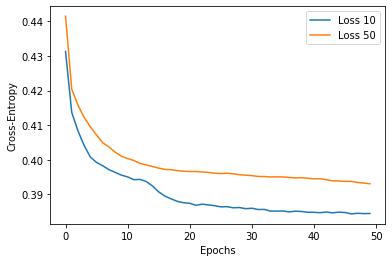

In [17]:
plt.plot(history1['loss'], label='Loss 10')
plt.plot(history2['loss'], label='Loss 50')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

In [18]:
test_loss_1, test_acc_1 = model1.evaluate(X_test, y_test)
test_loss_2, test_acc_2 = model2.evaluate(X_test, y_test)

print('Loss %f, Accuracy %f' % (test_loss_1, test_acc_1))
print('Loss %f, Accuracy %f' % (test_loss_2, test_acc_2))

29822/29822 [==============================] - 0s 16us/step
Loss 0.387666, Accuracy 0.834954
Loss 0.396191, Accuracy 0.830830


In [19]:
y_pred = model2.predict(X_test).astype(int)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8221447253705318
F1-score [0.90239234 0.        ]
              precision    recall  f1-score   support

           0       0.82      1.00      0.90     24518
           1       0.00      0.00      0.00      5304

    accuracy                           0.82     29822
   macro avg       0.41      0.50      0.45     29822
weighted avg       0.68      0.82      0.74     29822



C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


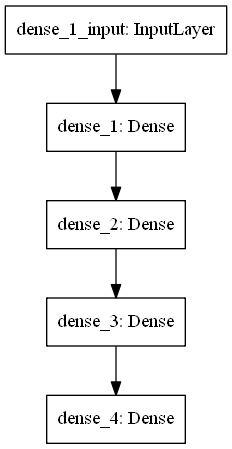

In [20]:
import pydot
from keras.utils import plot_model
plot_model(model1)

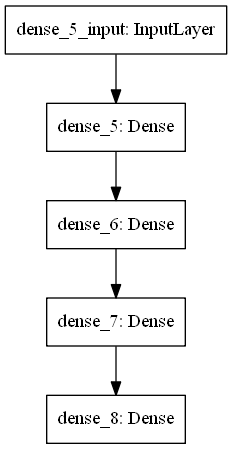

In [21]:
plot_model(model2)

In [22]:
model3 = build_model()

history3 = model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=10).history

Train on 69582 samples, validate on 29822 samples
Epoch 1/100
69582/69582 [==============================] - 10s 149us/step - loss: 0.4358 - accuracy: 0.8196 - val_loss: 0.4170 - val_accuracy: 0.8221
Epoch 2/100
69582/69582 [==============================] - 10s 142us/step - loss: 0.4135 - accuracy: 0.8226 - val_loss: 0.4104 - val_accuracy: 0.8239
Epoch 3/100
69582/69582 [==============================] - 10s 144us/step - loss: 0.4069 - accuracy: 0.8275 - val_loss: 0.4064 - val_accuracy: 0.8295
Epoch 4/100
69582/69582 [==============================] - 10s 140us/step - loss: 0.4027 - accuracy: 0.8295 - val_loss: 0.4028 - val_accuracy: 0.8285
Epoch 5/100
69582/69582 [==============================] - 10s 143us/step - loss: 0.3998 - accuracy: 0.8300 - val_loss: 0.4012 - val_accuracy: 0.8305
Epoch 6/100
69582/69582 [==============================] - 10s 144us/step - loss: 0.3978 - accuracy: 0.8305 - val_loss: 0.3995 - val_accuracy: 0.8307
Epoch 7/100
69582/69582 [=========================

In [23]:
print('Train: Loss %f, Accuracy %f' % (history1['loss'][49], history1['accuracy'][49]))
print('Val: Loss %f, Accuracy %f' % (history1['val_loss'][49], history1['val_accuracy'][49]))

Train: Loss 0.384425, Accuracy 0.835202
Val: Loss 0.387666, Accuracy 0.834954


In [24]:
print('Train: Loss %f, Accuracy %f' % (history2['loss'][49], history2['accuracy'][49]))
print('Val: Loss %f, Accuracy %f' % (history2['val_loss'][49], history2['val_accuracy'][49]))

Train: Loss 0.393031, Accuracy 0.831436
Val: Loss 0.396191, Accuracy 0.830830


In [25]:
print('Train: Loss %f, Accuracy %f' % (history3['loss'][99], history3['accuracy'][99]))
print('Val: Loss %f, Accuracy %f' % (history3['val_loss'][99], history3['val_accuracy'][99]))

Train: Loss 0.385708, Accuracy 0.834684
Val: Loss 0.389621, Accuracy 0.833445


29822/29822 [==============================] - 0s 14us/step
Loss 0.387666, Accuracy 0.834954
Loss 0.396191, Accuracy 0.830830
Loss 0.389621, Accuracy 0.833445


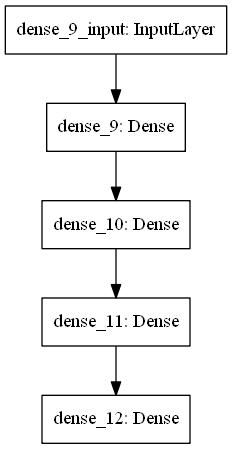

In [26]:
test_loss_3, test_acc_3 = model3.evaluate(X_test, y_test)

print('Loss %f, Accuracy %f' % (test_loss_1, test_acc_1))
print('Loss %f, Accuracy %f' % (test_loss_2, test_acc_2))
print('Loss %f, Accuracy %f' % (test_loss_3, test_acc_3))
plot_model(model3)

In [27]:
test_loss_3, test_acc_3 = model3.evaluate(X_test, y_test)

29822/29822 [==============================] - 1s 19us/step


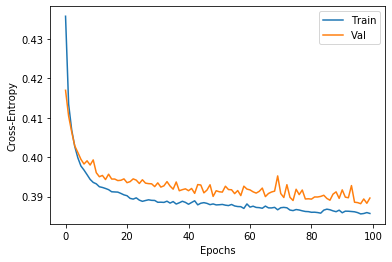

In [28]:
plt.plot(history3['loss'], label='Train')
plt.plot(history3['val_loss'], label='Val')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy')
plt.legend()
plt.show()

In [30]:
#scores = cross_val_score(model3, X_train, y_train, cv=10)
#print('Accuracy: %0.4f (+/- %0.3f)' % (scores.mean(), scores.std()))

#scores = cross_val_score(model3, X_train, y_train, cv=10, scoring='f1_macro')
#print('F1-score: %0.4f (+/- %0.3f)' % (scores.mean(), scores.std()))

In [32]:
from ann_visualizer.visualize import ann_viz;
#Build your model here
#ann_viz(model3,view=True, filename="net.gv")

**EARLY STOPPING**

In [33]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [34]:
es = EarlyStopping(monitor='val_loss', patience=10)
mc = ModelCheckpoint('best_model_NOREG.h5', monitor='val_loss', save_best_only=True)

model4 = build_model()
history4 = model4.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, 
                      batch_size=10, callbacks=[es,mc]).history

Train on 69582 samples, validate on 29822 samples
Epoch 1/100
69582/69582 [==============================] - 11s 165us/step - loss: 0.4295 - accuracy: 0.8221 - val_loss: 0.4186 - val_accuracy: 0.8221
Epoch 2/100
69582/69582 [==============================] - 12s 166us/step - loss: 0.4153 - accuracy: 0.8221 - val_loss: 0.4130 - val_accuracy: 0.8236
Epoch 3/100
69582/69582 [==============================] - 11s 163us/step - loss: 0.4106 - accuracy: 0.8253 - val_loss: 0.4091 - val_accuracy: 0.8256
Epoch 4/100
69582/69582 [==============================] - 12s 176us/step - loss: 0.4075 - accuracy: 0.8264 - val_loss: 0.4068 - val_accuracy: 0.8249
Epoch 5/100
69582/69582 [==============================] - 11s 163us/step - loss: 0.4046 - accuracy: 0.8257 - val_loss: 0.4037 - val_accuracy: 0.8244
Epoch 6/100
69582/69582 [==============================] - 12s 169us/step - loss: 0.4023 - accuracy: 0.8266 - val_loss: 0.4014 - val_accuracy: 0.8259
Epoch 7/100
69582/69582 [=========================

In [35]:
test_loss_4, test_acc_4 = model4.evaluate(X_test, y_test)

print('Loss %f, Accuracy %f' % (test_loss_1, test_acc_1))
print('Loss %f, Accuracy %f' % (test_loss_2, test_acc_2))
print('Loss %f, Accuracy %f' % (test_loss_3, test_acc_3))
print('Loss %f, Accuracy %f' % (test_loss_4, test_acc_4))

29822/29822 [==============================] - 0s 17us/step
Loss 0.387666, Accuracy 0.834954
Loss 0.396191, Accuracy 0.830830
Loss 0.389621, Accuracy 0.833445
Loss 0.393423, Accuracy 0.829991


**L2 REGULARIZATION**

In [36]:
from keras.regularizers import l2

def build_L2_model():
    # define the model
    model = Sequential()

    n_feature = X_train.shape[1]
    model.add(Dense(7, activation='relu', input_shape=(n_feature,), kernel_regularizer=l2(0.01)))
    model.add(Dense(5, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(3, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Dense(1, activation='sigmoid', kernel_regularizer=l2(0.01)))

    #compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [37]:
mc = ModelCheckpoint('best_model_L2.h5', monitor='val_loss', save_best_only=True)

L2_model = build_L2_model()
h_L2 = L2_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, 
                    batch_size=10, callbacks=[es,mc]).history

Train on 69582 samples, validate on 29822 samples
Epoch 1/1000
69582/69582 [==============================] - 10s 150us/step - loss: 0.4836 - accuracy: 0.8192 - val_loss: 0.4570 - val_accuracy: 0.8221
Epoch 2/1000
69582/69582 [==============================] - 10s 149us/step - loss: 0.4571 - accuracy: 0.8221 - val_loss: 0.4567 - val_accuracy: 0.8221
Epoch 3/1000
69582/69582 [==============================] - 12s 169us/step - loss: 0.4567 - accuracy: 0.8221 - val_loss: 0.4561 - val_accuracy: 0.8221
Epoch 4/1000
69582/69582 [==============================] - 11s 160us/step - loss: 0.4566 - accuracy: 0.8221 - val_loss: 0.4580 - val_accuracy: 0.8221
Epoch 5/1000
69582/69582 [==============================] - 11s 161us/step - loss: 0.4565 - accuracy: 0.8221 - val_loss: 0.4564 - val_accuracy: 0.8221
Epoch 6/1000
69582/69582 [==============================] - 11s 161us/step - loss: 0.4566 - accuracy: 0.8221 - val_loss: 0.4562 - val_accuracy: 0.8221
Epoch 7/1000
69582/69582 [==================

In [38]:
from keras.layers import Dropout

def build_DROPOUT_model():
    # define the model
    model = Sequential()

    n_feature = X_train.shape[1]
    h_dim=100
    model.add(Dense(7, activation='relu', input_shape=(n_feature,)))
    model.add(Dropout(0.2))
    model.add(Dense(5, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(3, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    
    #compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [39]:
mc = ModelCheckpoint('best_model_DROPOUT.h5', monitor='val_loss', save_best_only=True)

DROPOUT_model = build_DROPOUT_model()
h_DROPOUT = DROPOUT_model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                              epochs=1000, batch_size=10, callbacks=[es,mc]).history

Train on 69582 samples, validate on 29822 samples
Epoch 1/1000
69582/69582 [==============================] - 14s 200us/step - loss: 0.4598 - accuracy: 0.8221 - val_loss: 0.4270 - val_accuracy: 0.8221
Epoch 2/1000
69582/69582 [==============================] - 13s 191us/step - loss: 0.4381 - accuracy: 0.8221 - val_loss: 0.4261 - val_accuracy: 0.8221
Epoch 3/1000
69582/69582 [==============================] - 13s 192us/step - loss: 0.4343 - accuracy: 0.8221 - val_loss: 0.4223 - val_accuracy: 0.8221
Epoch 4/1000
69582/69582 [==============================] - 13s 193us/step - loss: 0.4329 - accuracy: 0.8221 - val_loss: 0.4217 - val_accuracy: 0.8221
Epoch 5/1000
69582/69582 [==============================] - 13s 193us/step - loss: 0.4322 - accuracy: 0.8221 - val_loss: 0.4208 - val_accuracy: 0.8221
Epoch 6/1000
69582/69582 [==============================] - 13s 193us/step - loss: 0.4320 - accuracy: 0.8221 - val_loss: 0.4224 - val_accuracy: 0.8221
Epoch 7/1000
69582/69582 [==================

In [40]:
# laod best models and test them
from keras.models import load_model

best_NOREG_model = load_model('best_model_NOREG.h5')
best_L2_model = load_model('best_model_L2.h5')
best_DROPOUT_model = load_model('best_model_DROPOUT.h5')

loss_NOREG, acc_NOREG = best_NOREG_model.evaluate(X_test, y_test)
loss_L2, acc_L2 = best_L2_model.evaluate(X_test, y_test)
loss_DROPOUT, acc_DROPOUT = best_DROPOUT_model.evaluate(X_test, y_test)

29822/29822 [==============================] - 1s 26us/step


In [41]:
print('Loss %f, Accuracy %f' % (loss_NOREG, acc_NOREG))
print('Loss %f, Accuracy %f' % (loss_L2, acc_L2))
print('Loss %f, Accuracy %f' % (loss_DROPOUT, acc_DROPOUT))

Loss 0.389872, Accuracy 0.829287
Loss 0.456146, Accuracy 0.822145
Loss 0.412811, Accuracy 0.822145
